#Importing Libraries

In [2]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk import  PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [3]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

df = pd.read_csv('/content/Corona.csv',encoding='Latin1', error_bad_lines=False)

<ipython-input-3-c1ce50275a44>:7: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/Corona.csv',encoding='Latin1', error_bad_lines=False)


In [4]:
df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [5]:
df.shape

(41157, 6)

In [6]:
df.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [8]:
df.Sentiment.value_counts().head()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

#Pre-processing Data

In [9]:
#Remove all the rows with empty values in OriginalTweets
df.dropna(how='all', axis=0, subset=['OriginalTweet'], inplace=True)

In [10]:
df.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative


In [11]:
df['Sentiment'] = df['Sentiment'].str.replace('Extremely Positive', 'Positive')

In [12]:
df['Sentiment'] = df['Sentiment'].str.replace('Extremely Negative', 'Negative')

In [13]:
df.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [15]:
df.Sentiment.value_counts().head(3)

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

#Cleaning the Data

In [16]:
# now we will clean the data
def clean_text(text_cleaned):
  ps = PorterStemmer()
  text_cleaned = re.sub('https?://\S+|www\.\S+', ' ', text_cleaned)
  text_cleaned = re.sub('\[.*?\]', ' ', text_cleaned)
  text_cleaned = re.sub('<.*?>+', ' ', text_cleaned)
  text_cleaned = re.sub('\n', '', text_cleaned)
  text_cleaned = re.sub('\r', ' ', text_cleaned)
  text_cleaned = re.sub('[%s]' % re.escape(string.punctuation), '', text_cleaned)
  text_cleaned = re.sub(' +', ' ', text_cleaned) # we will replace extra spaces with one space
  text_cleaned = text_cleaned.lower() # we will convert all sentences to lower case
  tokens = text_cleaned.split(" ") # we will split all the worlds in each words
  tokens=[token for token in tokens if token not in STOPWORDS] # we will removes all the stop words from text
  text_cleaned = " ".join([ps.stem(token) for token in tokens]) # we will converts all the tokens in small sets of words

  return text_cleaned

In [17]:
# now we will create a new column for cleaned tweets
df['cleaned_tweets'] = df['OriginalTweet'].apply(lambda x:clean_text(x))

In [18]:
df.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweets
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbi philgahan chrisitv
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advic talk neighbour famili exchang phone numb...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronaviru australia woolworth give elderli di...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock one empti pleas dont panic will eno...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,readi go supermarket covid19 outbreak im paran...
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,news regionâ first confirm covid19 case came ...
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive,cashier groceri store share insight covid19 pr...
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral,supermarket today didnt buy toilet paper rebel...
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive,due covid19 retail store classroom atlanta wil...
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative,corona preventionw stop buy thing cash use onl...


In [19]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


#Vader Sentiment Analaysis

In [20]:
import vaderSentiment

In [21]:
# now we will do Sentiment Intensity Analaysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [22]:
def sentiment_analyzer_scores(sentence):
  score = analyser.polarity_scores(sentence)
  return score

def compound_score(text):
  comp = sentiment_analyzer_scores(text)
  return comp['compound']

In [23]:
# now we will create a new column for sentiment_score in dataframe
df['sentiment_score'] = df['OriginalTweet'].apply(lambda x:compound_score(x))
df['sentiment_score']

0        0.0000
1        0.2500
2        0.4588
3        0.8456
4        0.5382
          ...  
41152    0.0000
41153   -0.6369
41154    0.4184
41155    0.0258
41156   -0.4576
Name: sentiment_score, Length: 41157, dtype: float64

In [24]:
# Now we will check how many reviews are positive, negative & neutral
def sentiment_category(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

In [25]:
df['tweets_category'] = df['sentiment_score'].apply(lambda x:sentiment_category(x))

Text(0.5, 1.0, 'Distribution of Tweets_review')

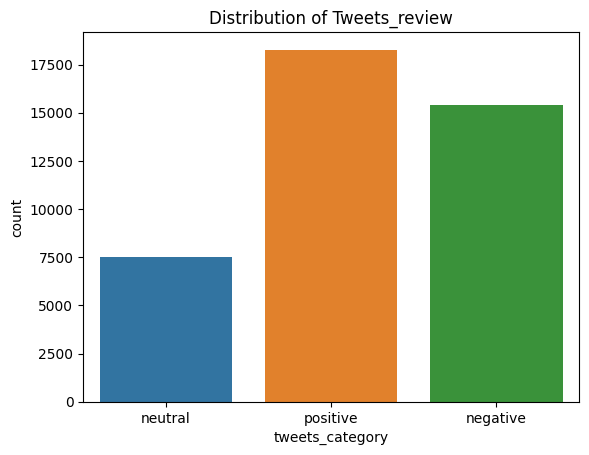

In [26]:
# now we will plot the graph for vizualization
import seaborn as sns
sns.countplot(data=df, x='tweets_category').set_title("Distribution of Tweets_review")

In [27]:
positive_tweets=df.loc[df['tweets_category']=='positive','cleaned_tweets'].tolist()
positive_tweets[0:5]

['advic talk neighbour famili exchang phone number creat contact list phone number neighbour school employ chemist gp set onlin shop account poss adequ suppli regular med order',
 'coronaviru australia woolworth give elderli disabl dedic shop hour amid covid19 outbreak ',
 'food stock one empti pleas dont panic will enough food everyon take need stay calm stay safe covid19fr covid19 covid19 coronaviru confin confinementot confinementgener ',
 'readi go supermarket covid19 outbreak im paranoid food stock litterali empti coronaviru seriou thing pleas dont panic caus shortag coronavirusfr restezchezv stayathom confin ',
 'news regionâ\x92 first confirm covid19 case came sullivan counti last week peopl flock area store purchas clean suppli hand sanit food toilet paper good timdodson report ']

In [28]:
negative_tweets=df.loc[df['tweets_category']=='negative','cleaned_tweets'].tolist()
negative_tweets[0:5]

['supermarket today didnt buy toilet paper rebel toiletpapercrisi covid19 ',
 'corona preventionw stop buy thing cash use onlin payment method corona spread note prefer onlin shop home time fight covid 19 govindia indiafightscorona',
 '100 nation infict covid 19 world must play fair china 100 gover must demand china adopt new guild line food safti chines gover guilti irosponc life global scale',
 '10downingstreet grantshapp done ensur food essenti product restock supermarket panic buy activ discourag left checkout staff polic action selfish profit',
 'prepar higher demand potenti food shortag hunger coalit purchas 10 percent food implement new protocol due covid19 coronaviru ']

In [29]:
neutral_tweets=df.loc[df['tweets_category']=='neutral','cleaned_tweets'].tolist()
neutral_tweets[0:10]

['menyrbi philgahan chrisitv ',
 'month hasnt crowd supermarket restaur reduc hour close mall mean everyon now use entranc depend singl supermarket manila lockdown covid2019 philippin ',
 ' 13 ',
 'eyeonthearct 16mar20 russia consum surveil watchdog report case high arctic man travel iran covid19 101 observ ',
 ' covid19 coronaviru pandem impact consum shop behavior purchas decis retail sale accord first insight studi',
 'retail store closur explod coronaviru via cnbc brickandmortar ',
 'went supermarket yesterday toilet paper gone anyth corona viru covid2019',
 'break stori onlin cloth shop rise peopl find mysteri white patch form cloth quarantinelif coronavirusoutbreak coronaviru imadethisup fakenew ',
 'line outsid target custom wait store open morn',
 'covid19 restrict spark run cannabi store theyr close yet custom stock cannabi weekend prepar retail store restrict come day ']

In [30]:
tweets_per_country=df['Location'].value_counts().loc[lambda x:x > 100].reset_index(name='counts')
print(tweets_per_country)


                      index  counts
0                    London     540
1             United States     528
2           London, England     520
3              New York, NY     395
4            Washington, DC     373
5            United Kingdom     337
6           Los Angeles, CA     281
7                     India     268
8                        UK     232
9                 Australia     225
10                      USA     223
11                   Canada     191
12  England, United Kingdom     191
13         Toronto, Ontario     160
14                   Global     159
15              Chicago, IL     155
16          California, USA     153
17        San Francisco, CA     152
18               Boston, MA     150
19            New York, USA     140
20         New Delhi, India     138
21              Atlanta, GA     126
22                 New York     126
23            Mumbai, India     109
24                Worldwide     101


<Axes: xlabel='index', ylabel='counts'>

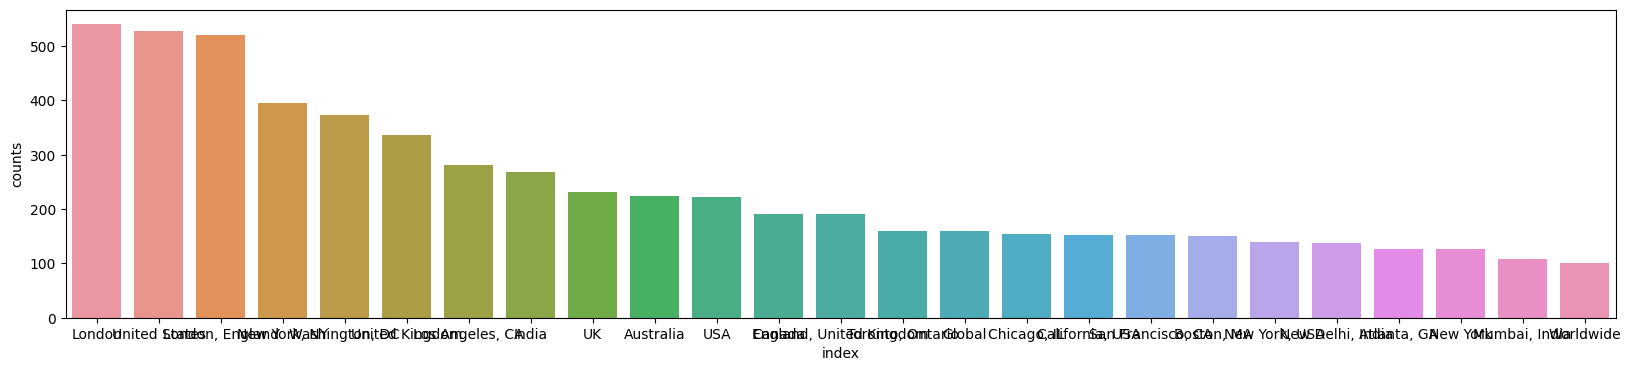

In [31]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.barplot(x='index', y='counts', data=tweets_per_country, width=0.8)

#WordCloud

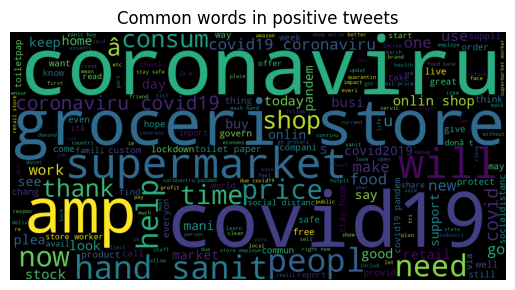

In [32]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=800, width=1600, background_color='black')
wordcloud = wordcloud.generate(' '.join(df.loc[df['tweets_category']=='positive','cleaned_tweets'].tolist()))
plt.imshow(wordcloud)
plt.title("Common words in positive tweets")
plt.axis('off')
plt.show()

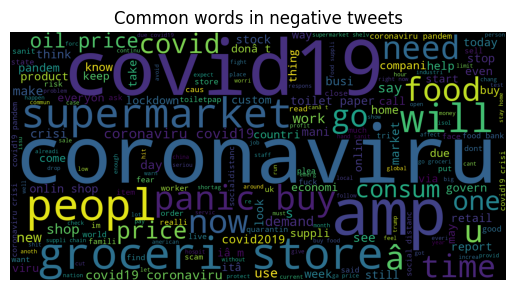

In [34]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=800, width=1600, background_color='black')
wordcloud = wordcloud.generate(' '.join(df.loc[df['tweets_category']=='negative','cleaned_tweets'].tolist()))
plt.imshow(wordcloud)
plt.title("Common words in negative tweets")
plt.axis('off')
plt.show()

In [35]:
# Now we will calculate the frequecy of each word occuring
from collections import Counter
def getMostCommon(tweets_list, topn=20):
  tweets=" ".join(tweets_list)
  tokenised_tweets=tweets.split(" ")

  freq_counter=Counter(tokenised_tweets)
  return freq_counter.most_common(topn)

In [36]:
getMostCommon(df['cleaned_tweets'].tolist(),topn=20)

[('', 19410),
 ('coronaviru', 17953),
 ('covid19', 16811),
 ('price', 9014),
 ('store', 8146),
 ('supermarket', 7706),
 ('food', 7196),
 ('groceri', 6727),
 ('peopl', 5539),
 ('consum', 5177),
 ('shop', 5101),
 ('amp', 4952),
 ('will', 4540),
 ('go', 4196),
 ('19', 3699),
 ('need', 3534),
 ('onlin', 3414),
 ('covid', 3251),
 ('pandem', 3156),
 ('time', 3117)]

In [37]:
tweets_list = df['cleaned_tweets'].tolist()
import seaborn as sns

In [38]:
def plotMostCommonWords(tweets_list,topn=20,title="Common tweets Words",color="blue",axis=None): #default number of words is given as 20
    top_words=getMostCommon(tweets_list,topn=topn)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))

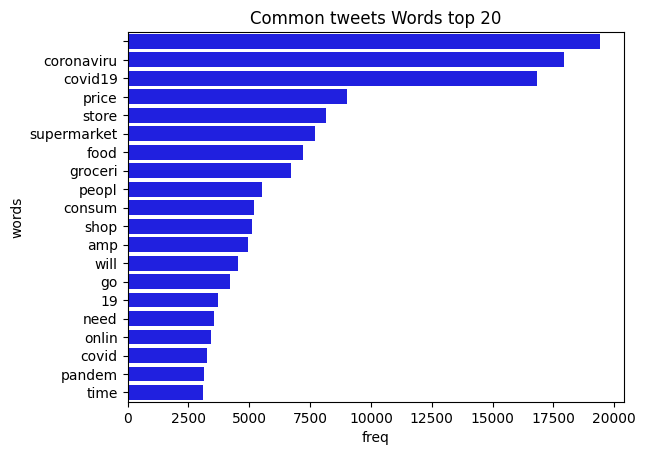

In [39]:
plotMostCommonWords(tweets_list)

In [40]:
top_20_positive = getMostCommon(positive_tweets, 20)
top_20_positive

[('', 8677),
 ('coronaviru', 7677),
 ('covid19', 7454),
 ('store', 3895),
 ('price', 3347),
 ('supermarket', 3346),
 ('groceri', 3255),
 ('food', 2953),
 ('amp', 2564),
 ('shop', 2537),
 ('consum', 2334),
 ('peopl', 2277),
 ('hand', 2136),
 ('help', 2130),
 ('will', 2124),
 ('sanit', 2071),
 ('go', 1812),
 ('onlin', 1807),
 ('need', 1741),
 ('19', 1701)]

In [41]:
top_20_negative = getMostCommon(negative_tweets, 20)
top_20_negative

[('coronaviru', 6760),
 ('', 6555),
 ('covid19', 6076),
 ('price', 4328),
 ('food', 3576),
 ('supermarket', 2952),
 ('store', 2692),
 ('peopl', 2661),
 ('groceri', 2225),
 ('panic', 1919),
 ('amp', 1906),
 ('will', 1818),
 ('go', 1782),
 ('buy', 1768),
 ('consum', 1740),
 ('shop', 1635),
 ('19', 1471),
 ('need', 1366),
 ('crisi', 1342),
 ('demand', 1317)]

In [42]:
# Plot for Positive and Negative graphs

def plotMostCommonWords(tweets_list,topn=20,title="Common Review Words",color="blue",axis=None): #default number of words is given as 20
    top_words=getMostCommon(tweets_list,topn=topn)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))

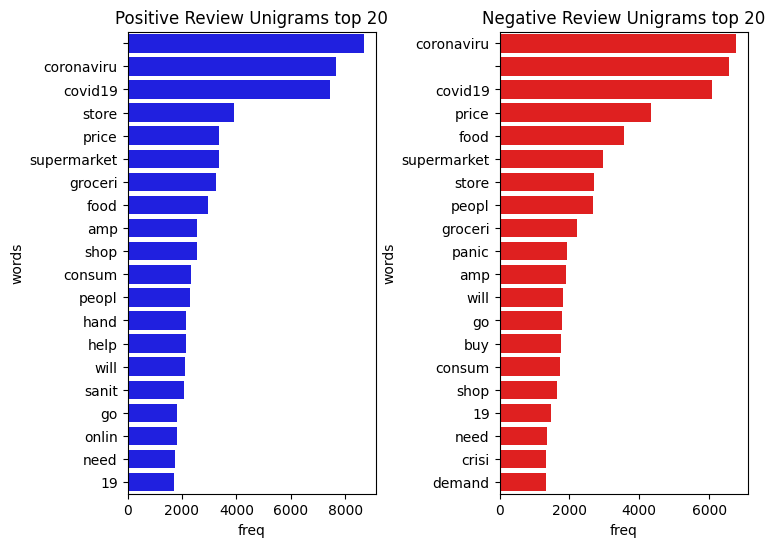

In [43]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 8,6 ## Sets the heigth and width of image


fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=0.5) #Adjusts the space between the two plots
plotMostCommonWords(positive_tweets,20,"Positive Review Unigrams",axis=ax[0])

plotMostCommonWords(negative_tweets,20,"Negative Review Unigrams",color="red",axis=ax[1])

#Machine Learning

In [44]:
#For Machine Learning Models the data needs to be prepared

In [45]:
#Split the Dataset into Training and Test

In [46]:
df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweets,sentiment_score,tweets_category
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbi philgahan chrisitv,0.0000,neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advic talk neighbour famili exchang phone numb...,0.2500,positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronaviru australia woolworth give elderli di...,0.4588,positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock one empti pleas dont panic will eno...,0.8456,positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,readi go supermarket covid19 outbreak im paran...,0.5382,positive


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
seed = 42
train, valid = train_test_split(df, test_size=0.2, stratify=df.Sentiment.values, random_state=seed)

In [49]:
print(train.shape)
print(valid.shape)

(32925, 9)
(8232, 9)


#Vectorization using TextVectorization

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [51]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [52]:
import nltk
stop = list(stopwords.words('english'))
cv = CountVectorizer(decode_error = 'replace', stop_words = stop)

X_train = cv.fit_transform(train.cleaned_tweets.values)
X_valid = cv.transform(valid.cleaned_tweets.values)

y_train = train.Sentiment.values
y_valid = valid.Sentiment.values

In [53]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(32925, 44299)
(8232, 44299)
(32925,)
(8232,)


#ML Model Building


Logistic Regression

In [54]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(solver='lbfgs', max_iter=400)

LR.fit(X_train, y_train)

LR_pred = LR.predict(X_valid)
LR_acc = accuracy_score(y_valid, LR_pred)
print("Training accuracy Score :", LR.score(X_train, y_train))
print("Validation accuracy Score :", LR_acc)
print(classification_report(LR_pred, y_valid))

Training accuracy Score : 0.9572968868640851
Validation accuracy Score : 0.7848639455782312
              precision    recall  f1-score   support

    Negative       0.80      0.81      0.81      3028
     Neutral       0.67      0.67      0.67      1541
    Positive       0.82      0.81      0.82      3663

    accuracy                           0.78      8232
   macro avg       0.76      0.76      0.76      8232
weighted avg       0.79      0.78      0.78      8232



Support Vector Machine

In [55]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_pred = svc.predict(X_valid)
svc_acc = accuracy_score(y_valid, svc_pred)
print("Training accuracy Score :", svc.score(X_train, y_train))
print("Validation accuracy Score :", svc_acc)
print(classification_report(svc_pred, y_valid))


Training accuracy Score : 0.9397722095671982
Validation accuracy Score : 0.7723517978620019
              precision    recall  f1-score   support

    Negative       0.78      0.79      0.79      3057
     Neutral       0.65      0.68      0.66      1457
    Positive       0.82      0.79      0.80      3718

    accuracy                           0.77      8232
   macro avg       0.75      0.76      0.75      8232
weighted avg       0.77      0.77      0.77      8232



In [56]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_valid)
rfc_acc = accuracy_score(y_valid, rfc_pred)
print("Training accuracy Score :", rfc.score(X_train, y_train))
print("Validation accuracy Score :", rfc_acc)
print(classification_report(rfc_pred, y_valid))


Training accuracy Score : 0.9998481397114655
Validation accuracy Score : 0.7610544217687075
              precision    recall  f1-score   support

    Negative       0.75      0.79      0.77      2951
     Neutral       0.65      0.71      0.68      1404
    Positive       0.82      0.76      0.79      3877

    accuracy                           0.76      8232
   macro avg       0.74      0.75      0.74      8232
weighted avg       0.76      0.76      0.76      8232



In [57]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(X_train,y_train)

nb_pred= nb.predict(X_valid)
nb_acc = accuracy_score(y_valid, nb_pred)
print("Training accuracy Score :", nb.score(X_train, y_train))
print("Validation accuracy Score :", nb_acc)
print(classification_report(nb_pred, y_valid))

Training accuracy Score : 0.7977220956719818
Validation accuracy Score : 0.6672740524781341
              precision    recall  f1-score   support

    Negative       0.74      0.67      0.71      3406
     Neutral       0.19      0.73      0.30       405
    Positive       0.81      0.66      0.72      4421

    accuracy                           0.67      8232
   macro avg       0.58      0.69      0.58      8232
weighted avg       0.75      0.67      0.70      8232



#Matrix Result

In [58]:
models = pd.DataFrame({'Model': ['Logistic Regression','Support vector Machine',
                                 'Random Forest', 'Naive Bayes'],
                       'Test accuracy': [LR_acc, svc_acc,rfc_acc, nb_acc,]})
models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
0,Logistic Regression,0.784864
1,Support vector Machine,0.772352
2,Random Forest,0.761054
3,Naive Bayes,0.667274


#Deep Learning Models


In [59]:
df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweets,sentiment_score,tweets_category
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbi philgahan chrisitv,0.0000,neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advic talk neighbour famili exchang phone numb...,0.2500,positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronaviru australia woolworth give elderli di...,0.4588,positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock one empti pleas dont panic will eno...,0.8456,positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,readi go supermarket covid19 outbreak im paran...,0.5382,positive


In [60]:
X = train['OriginalTweet'].copy()
y = train['Sentiment'].copy()

In [61]:
X.head(10)

14776    So much for online shopping! Over 70Âs are be...
18231    Keep up to date with @NCLC4consumers advocacy ...
26022    EnLink said on Wednesday it laid off ~300 empl...
13145    Plenty of empty shelves at Walmart ? #covid_19...
21781    if shops are passing on prices, why are farmer...
15201    Hello welcome to 2020 where everyone is #Quara...
15350    Bought green peppers at the grocery store.... ...
6867     U.S. Department Of Education Provides COVID-19...
1850     LetÂs all remember this Âgrocery store worke...
24204    Chris Dillon, real-estate author and founder o...
Name: OriginalTweet, dtype: object

In [65]:
X_test = valid['OriginalTweet'].copy()
y_test = valid['Sentiment'].copy()

In [66]:
X_test.head(10)

40808    #Australia's booming #LNG industry stalls afte...
5985         Violinists Reenact  Titanic  at Grocery Store
20744    Read more on consumer food expenditure pattern...
33710    Stay home as much as possible wash your hands ...
13298    5/ &amp; #Alabanza 4 Supermarket stockers and ...
39033    How are COVID 19 and Low Oil Prices affecting ...
39666    IMF praises Oman for tackling COVID-19, slump ...
8274     Saleem Safi in Report card :\r\r\n "Imran Govt...
20580       No Toilet Paper On Aisle 20 Beat The System by
8350     All components of the global and domestic supp...
Name: OriginalTweet, dtype: object

In [67]:
X_cleaned = X.apply(clean_text)

In [68]:
X_cleaned.head(10)

14776    much onlin shop 70â told self isol way get fo...
18231    keep date nclc4consum advocaci resourc protect...
26022    enlink said wednesday laid 300 employe 20 work...
13145    plenti empti shelv walmart covid19 coronaviru ...
21781    shop pass price farmer goug us now weve help s...
15201    hello welcom 2020 everyon quarantin state gove...
15350    bought green pepper groceri store now im sure ...
6867     us depart educ provid covid19 guidanc colleg u...
1850     letâ rememb âgroceri store worker heroesâ p...
24204    chri dillon realest author founder dillon comm...
Name: OriginalTweet, dtype: object

In [69]:
data_frame=pd.DataFrame({'Tweets': X_cleaned,
                         'Sentiment': y
                         })

In [71]:
data_frame.head()

,Tweets,Sentiment
14776,much onlin shop 70â told self isol way get fo...,Negative
18231,keep date nclc4consum advocaci resourc protect...,Negative
26022,enlink said wednesday laid 300 employe 20 work...,Negative
13145,plenti empti shelv walmart covid19 coronaviru ...,Negative
21781,shop pass price farmer goug us now weve help s...,Positive


In [72]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_cleaned)
X=tokenizer.texts_to_sequences(X_cleaned)
vocab_size=len(tokenizer.word_index)+1
print(f'\nword size : {vocab_size}')
print(f'\nOriginal Sentence : {X_cleaned[10]}')
print(f'\nafter tokenization :{X[10]}')
X=pad_sequences(X, padding='post')
print(f'\nAfter padding: {X[10]}')


word size : 45435

Original Sentence : month hasnt crowd supermarket restaur reduc hour close mall mean everyon now use entranc depend singl supermarket manila lockdown covid2019 philippin 

after tokenization :[115, 1849, 3403, 67, 499, 734, 253, 20, 48, 2770, 28, 1249, 253, 792, 265, 2, 9, 99, 49, 434, 3526]

After padding: [ 115 1849 3403   67  499  734  253   20   48 2770   28 1249  253  792
  265    2    9   99   49  434 3526    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]


In [73]:
encoding={
    'Extremely Negative':0,
    'Negative':0,
    'Neutral':1,
    'Positive':2,
    'Extremely Positive':2
}
labels=['Negative','Neutral','Positive']
y.replace(encoding,inplace=True)

#Traning Process

In [74]:
EPOCH=2
BATCH_SIZE=8
VALIDATION_SPLIT=0.12
EMBEDDING_DIMS=16


ANN

In [98]:
import tensorflow.keras.layers as L
from tensorflow.keras.losses import SparseCategoricalCrossentropy
modelANN=tf.keras.Sequential([
    L.Embedding(vocab_size, EMBEDDING_DIMS, input_length=X.shape[1]),
    L.Dense(512,activation='relu'),
    L.Dense(512,activation='relu'),
    L.GlobalMaxPool1D(),
    L.Dropout(0.4),
    L.Dense(64,activation='relu'),
    L.Dropout(0.4),
    L.Dense(3,activation='softmax')
])
modelANN.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer='adam',metrics=['accuracy'])
modelANN.add(L.Flatten(input_shape=(32,32,3)))
modelANN.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 46, 16)            726960    
                                                                 
 dense_18 (Dense)            (None, 46, 512)           8704      
                                                                 
 dense_19 (Dense)            (None, 46, 512)           262656    
                                                                 
 global_max_pooling1d_3 (Gl  (None, 512)               0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_20 (Dense)            (None, 64)                32832     
                                                      

CNN

In [79]:
modelCNN = tf.keras.Sequential([ L.Embedding(vocab_size,EMBEDDING_DIMS , input_length=X.shape[1]),
    L.Conv1D(512,activation='relu',kernel_size=5,padding='Same'),
    L.MaxPool1D(),
    L.Conv1D(512,activation='relu',kernel_size=3,padding='Same'),
    L.MaxPool1D(),
    L.Dropout(0.4),
    L.GlobalAveragePooling1D(),
    L.Dense(64,activation='relu'),
    L.Dropout(0.4),
    L.Dense(3,activation='softmax')])
modelCNN.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer='adam',metrics=['accuracy'])
modelCNN.add(L.Flatten(input_shape=(32,32,3)))
modelCNN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 46, 16)            726960    
                                                                 
 conv1d_2 (Conv1D)           (None, 46, 512)           41472     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 23, 512)           0         
 g1D)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, 23, 512)           786944    
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 11, 512)           0         
 g1D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 11, 512)          

RNN

In [81]:
modelRNN=tf.keras.Sequential([
    L.Embedding(vocab_size, EMBEDDING_DIMS, input_length=X.shape[1]),
    L.SimpleRNN(512,return_sequences=True,activation='relu'),
    L.SimpleRNN(512,return_sequences=True,activation='relu'),
    L.GlobalAveragePooling1D(),
    L.Dense(64,activation='relu'),
    L.Dropout(0.4),
    L.Dense(3,activation='softmax')
])
modelRNN.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer='adam' ,metrics=['accuracy'])
modelRNN.add(L.Flatten(input_shape=(32,32,3)))
modelRNN.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 46, 16)            726960    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 46, 512)           270848    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 46, 512)           524800    
                                                                 
 global_average_pooling1d_3  (None, 512)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_14 (Dense)            (None, 64)                32832     
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                      

LSTM

In [82]:
modelLSTM=tf.keras.Sequential([
    L.Embedding(vocab_size, EMBEDDING_DIMS, input_length=X.shape[1]),
    L.Bidirectional(L.LSTM(256,return_sequences=True)),
    L.Bidirectional(L.LSTM(256,return_sequences=True)),
    L.GlobalMaxPool1D(),
    L.Dropout(0.4),
    L.Dense(64,activation='relu'),
    L.Dropout(0.4),
    L.Dense(3,activation='softmax')
])
modelLSTM.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer='adam' ,metrics=['accuracy'])
modelLSTM.add(L.Flatten(input_shape=(32,32,3)))
modelLSTM.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 46, 16)            726960    
                                                                 
 bidirectional (Bidirection  (None, 46, 512)           559104    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 46, 512)           1574912   
 onal)                                                           
                                                                 
 global_max_pooling1d_2 (Gl  (None, 512)               0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                      

Training Models

In [99]:
print('Artificial Neural Network Model\n')
historyANN=modelANN.fit(X, y, epochs=EPOCH, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE)

Artificial Neural Network Model

Epoch 1/2
3622/3622 [==============================] - 142s 39ms/step - loss: 0.8980 - accuracy: 0.6396 - val_loss: 0.8637 - val_accuracy: 0.6808
Epoch 2/2
3622/3622 [==============================] - 135s 37ms/step - loss: 0.8262 - accuracy: 0.7214 - val_loss: 0.8461 - val_accuracy: 0.7013


In [100]:
print('Convolutional Neural Network Model\n')
historyCNN=modelCNN.fit(X, y, epochs=EPOCH, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE)

Convolutional Neural Network Model

Epoch 1/2
3622/3622 [==============================] - 230s 64ms/step - loss: 0.7239 - accuracy: 0.8248 - val_loss: 0.7812 - val_accuracy: 0.7674
Epoch 2/2
3622/3622 [==============================] - 229s 63ms/step - loss: 0.7099 - accuracy: 0.8400 - val_loss: 0.7754 - val_accuracy: 0.7730


In [84]:
print('Recurrent Neural Network Model\n')
historyRNN=modelRNN.fit(X, y, epochs=EPOCH, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE)
print('Long Short Term Memory Model\n')
historyLSTM = modelLSTM.fit(X, y, epochs=EPOCH, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE)

Recurrent Neural Network Model

Epoch 1/2
3622/3622 [==============================] - 783s 215ms/step - loss: 1.0534 - accuracy: 0.4723 - val_loss: 0.9806 - val_accuracy: 0.5452
Epoch 2/2
3622/3622 [==============================] - 767s 212ms/step - loss: 1.1697 - accuracy: 0.3813 - val_loss: 1.1791 - val_accuracy: 0.3723
Long Short Term Memory Model

Epoch 1/2
3622/3622 [==============================] - 2462s 677ms/step - loss: 1.0547 - accuracy: 0.4305 - val_loss: 1.0427 - val_accuracy: 0.4424
Epoch 2/2
3622/3622 [==============================] - 2844s 785ms/step - loss: 1.0137 - accuracy: 0.5109 - val_loss: 0.9765 - val_accuracy: 0.5578


Cleaning Test data

In [101]:
X_test = X_test.apply(clean_text)
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, padding='post')
y_test.replace(encoding, inplace=True)

AttributeError: ignored

In [102]:
models={'ANN':modelANN, 'CNN':modelCNN, 'RNN':modelRNN, 'LSTM':modelLSTM}
models

{'ANN': <keras.src.engine.sequential.Sequential at 0x7aa47320f400>,
 'CNN': <keras.src.engine.sequential.Sequential at 0x7aa4805a8a60>,
 'RNN': <keras.src.engine.sequential.Sequential at 0x7aa4804d0400>,
 'LSTM': <keras.src.engine.sequential.Sequential at 0x7aa48053f490>}

In [103]:
classes={}
for i,model in enumerate(models):
    prediction=models[model].predict(X_test)
    classes[model]=np.argmax(prediction,axis=1)

ValueError: ignored

In [92]:
classes

{}

In [89]:
for i, model in enumerate(models):
  print(model)
  loss, accuracy=models[model].evaluate(X_test, y_test, verbose=0)
  print(f'Test Loss: {loss}')
  print(f'Test Accuracy: {accuracy}')

ANN


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Test Loss: 0.5695905685424805
Test Accuracy: 0.7921525835990906
CNN
Test Loss: 0.7647427916526794
Test Accuracy: 0.7838921546936035
RNN
Test Loss: 1.1772931814193726
Test Accuracy: 0.3741496503353119
LSTM
Test Loss: 0.973524808883667
Test Accuracy: 0.5651117563247681


#Classification Report

In [95]:
for i, c in enumerate(models):
  print(f'{models[i]}\n', classification_report(y_test, models[c], target_names=labels))

KeyError: ignored